<a href="https://colab.research.google.com/github/lekoianemerik/titanic/blob/explo%2Fdata/notebooks/dataexplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INIT

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [12]:
df = pd.read_csv('../data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
numeric_features = df[[
    "Age",
    "Fare",
    "SibSp"
]].copy()

categorical_features = df[[
    "Pclass",
    "Sex",
    "Parch"
]].copy()

In [15]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
numeric_features.describe()

,Age,Fare,SibSp
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008
std,14.526497,49.693429,1.102743
min,0.420000,0.000000,0.000000
25%,20.125000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,38.000000,31.000000,1.000000
max,80.000000,512.329200,8.000000


In [19]:
numeric_features[df.Survived == 0].describe()

,Age,Fare,SibSp
count,424.000000,549.000000,549.000000
mean,30.626179,22.117887,0.553734
std,14.172110,31.388207,1.288399
min,1.000000,0.000000,0.000000
25%,21.000000,7.854200,0.000000
50%,28.000000,10.500000,0.000000
75%,39.000000,26.000000,1.000000
max,74.000000,263.000000,8.000000


In [20]:
numeric_features[df.Survived == 1].describe()

,Age,Fare,SibSp
count,290.000000,342.000000,342.000000
mean,28.343690,48.395408,0.473684
std,14.950952,66.596998,0.708688
min,0.420000,0.000000,0.000000
25%,19.000000,12.475000,0.000000
50%,28.000000,26.000000,0.000000
75%,36.000000,57.000000,1.000000
max,80.000000,512.329200,4.000000


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Fare'}>],
       [<AxesSubplot: title={'center': 'SibSp'}>, <AxesSubplot: >]],
      dtype=object)

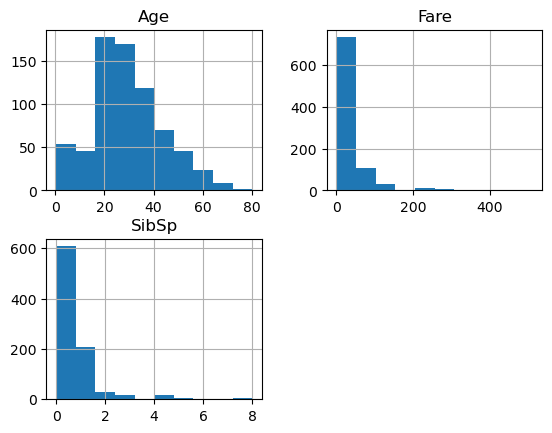

In [25]:
numeric_features.hist()

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Fare'}>],
       [<AxesSubplot: title={'center': 'SibSp'}>, <AxesSubplot: >]],
      dtype=object)

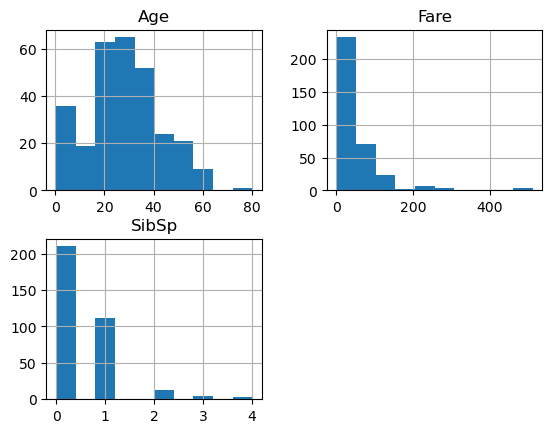

In [27]:
numeric_features[df.Survived == 1].hist()

<AxesSubplot: xlabel='Survived', ylabel='Age'>

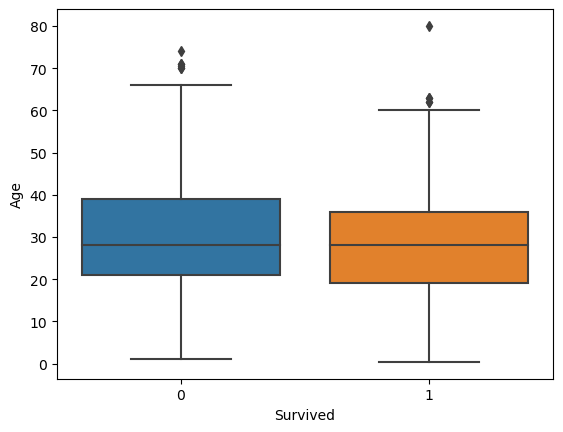

In [28]:
sns.boxplot(data=df, x='Survived', y='Age')

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

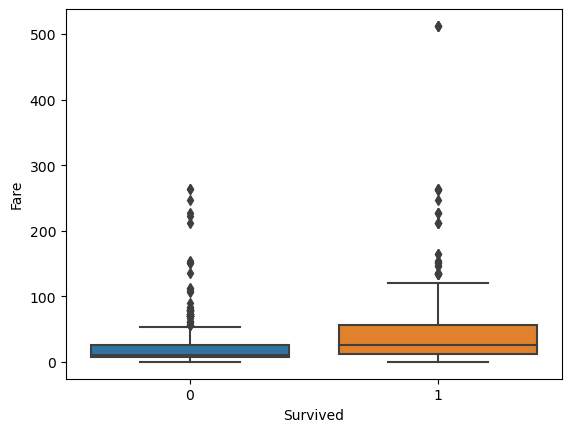

In [29]:
sns.boxplot(data=df, x='Survived', y='Fare')

c:\Users\ileko\Anaconda3\envs\titanic\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\ileko\Anaconda3\envs\titanic\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


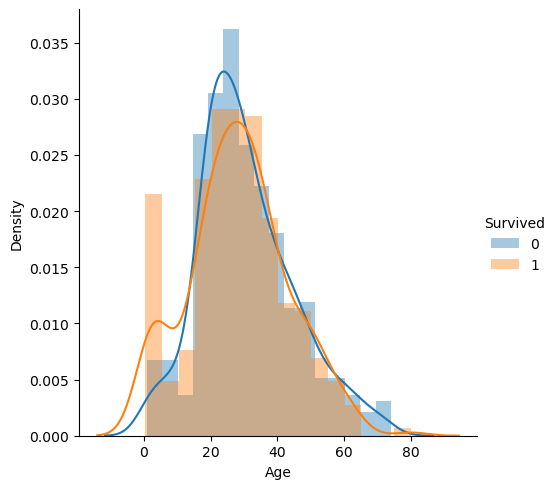

In [35]:
sns.FacetGrid(data=df, hue="Survived", height=5).map(sns.distplot, "Age").add_legend()
plt.show()


In [40]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pclass  891 non-null    int64 
 1   Sex     891 non-null    object
 2   Parch   891 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


In [39]:
categorical_features.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [41]:
categorical_features.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
categorical_features.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64